 # 1. Import libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Deep learning (TensorFlow)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Inline plots
%matplotlib inline

necessary libraries imported

 # 1. a. Load the Dataset and Explore Dimensions

In [2]:
# Load the dataset (make sure it's uploaded in Colab)
df = pd.read_csv('diabetes_01_health_indicators.csv')

# Check dimensions
print(f"Dataset shape: {df.shape}")

# Preview the data
df.head()

Dataset shape: (253680, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## check for missing values

In [3]:
# Check for null values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# Optional: check for any weird or placeholder values (e.g., -1 or 9999)
print("\nUnique values in each column (spot check):")
for col in df.columns[:5]:  # check first few columns
    print(f"{col}: {df[col].unique()[:10]}")  # preview unique values


Missing values per column:
 Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Unique values in each column (spot check):
Diabetes_binary: [0. 1.]
HighBP: [1. 0.]
HighChol: [1. 0.]
CholCheck: [1. 0.]
BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21.]


## 1.b.Calculate the class balance for Diabetes_binary

In [4]:
# Count of each class in the target variable
class_counts = df['Diabetes_binary'].value_counts()

# Percentage of each class
class_percent = df['Diabetes_binary'].value_counts(normalize=True) * 100

# Display results
print("Class counts:\n", class_counts)
print("\nClass percentages:\n", class_percent.round(2))

Class counts:
 Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

Class percentages:
 Diabetes_binary
0.0    86.07
1.0    13.93
Name: proportion, dtype: float64


## 1.c.Visualizing the class distribution using plots (bar plots,...)

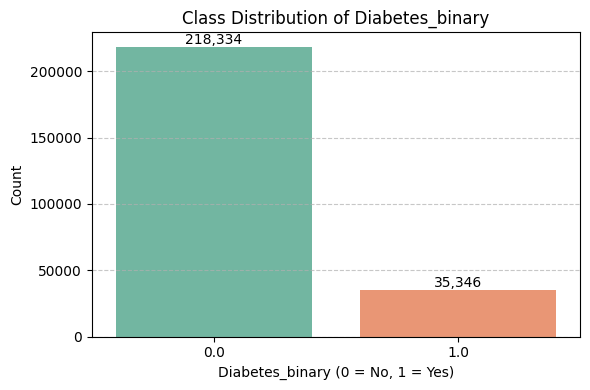

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_binary', data=df, palette='Set2')

# Add counts on top of bars
plt.text(x=0, y=class_counts[0], s=f'{class_counts[0]:,}', ha='center', va='bottom')
plt.text(x=1, y=class_counts[1], s=f'{class_counts[1]:,}', ha='center', va='bottom')

plt.title('Class Distribution of Diabetes_binary')
plt.xlabel('Diabetes_binary (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 1.d.Explore descriptive statistics and create a table

In [6]:
# Generate descriptive statistics for all columns
desc_stats = df.describe().T  # Transpose for better formatting

# Optionally round for report readability
desc_stats_rounded = desc_stats.round(2)

# Display the summary
desc_stats_rounded

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.14,0.35,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.43,0.49,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.42,0.49,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.96,0.19,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.38,6.61,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.44,0.50,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.04,0.20,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.09,0.29,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.76,0.43,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.63,0.48,0.0,0.0,1.0,1.0,1.0


## 1.e. Calculate the correlation matrix and generate heatmaps to visualize correlations

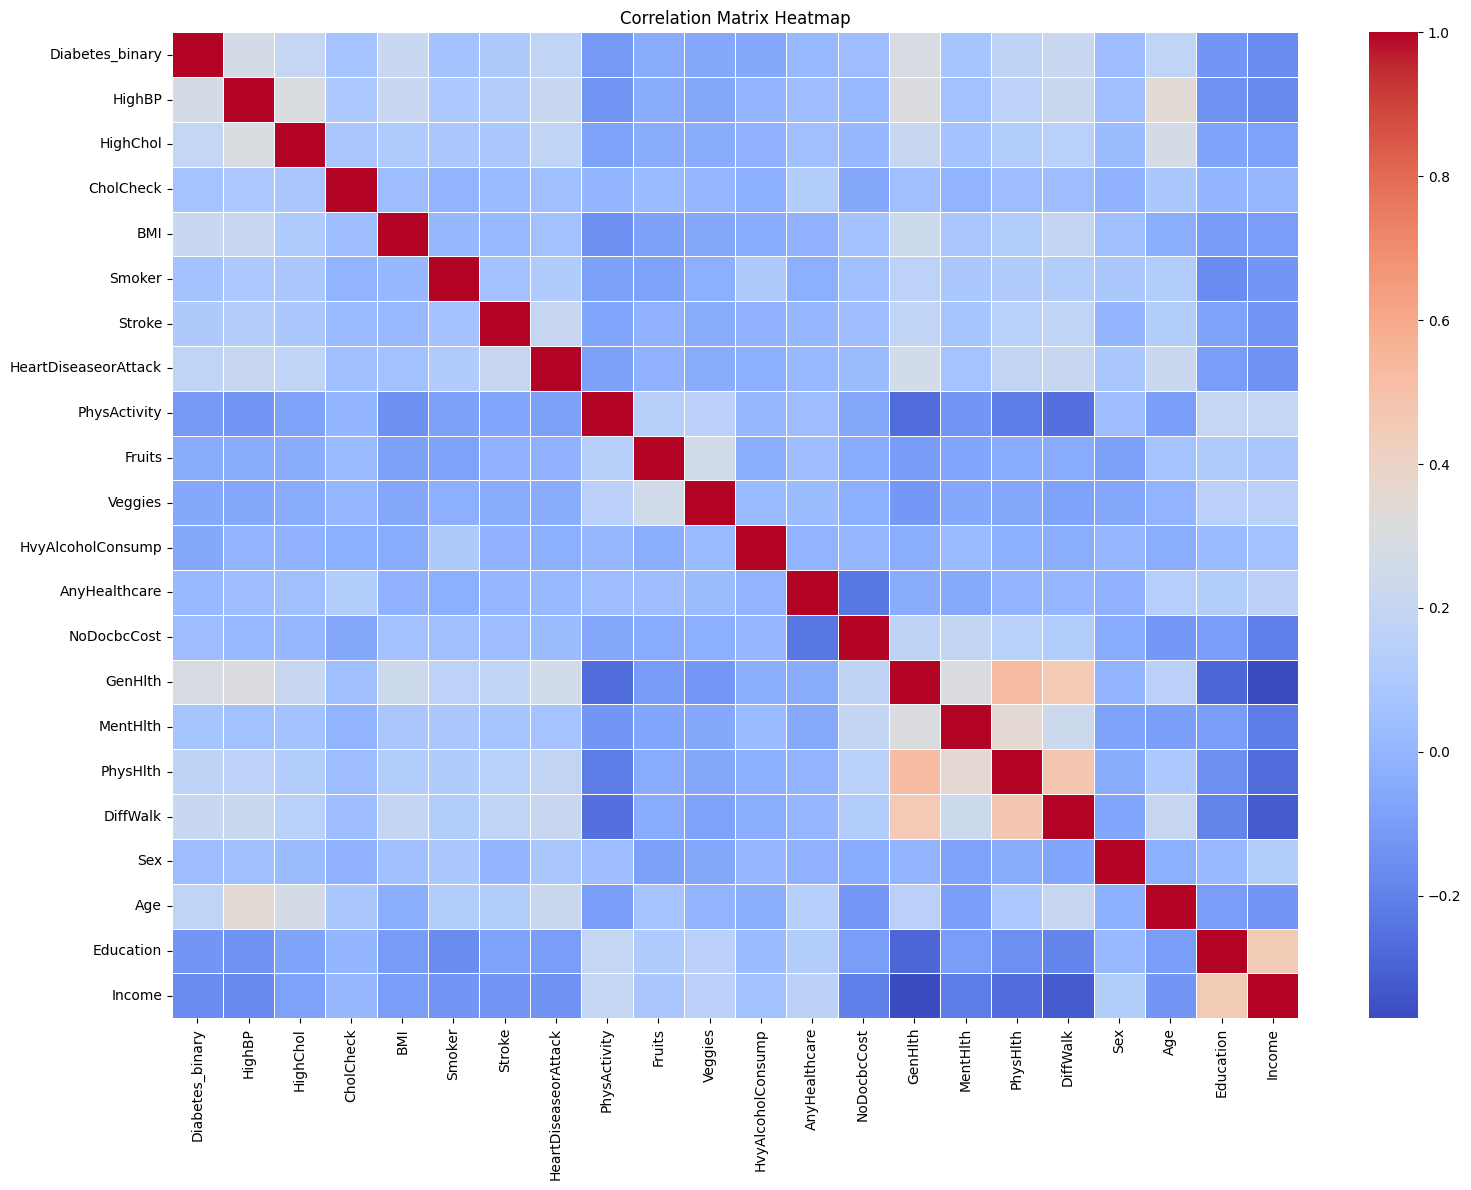

In [7]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [8]:
# Unstack matrix, sort, and filter high correlations (not 1.0)
high_corr = corr_matrix.unstack().sort_values(ascending=False)
high_corr = high_corr[(high_corr < 1.0) & (high_corr > 0.8)]
print("Highly correlated pairs:\n", high_corr.drop_duplicates())

Highly correlated pairs:
 Series([], dtype: float64)


# 2.Logistic Regression

## 2.a.Logistic regression (no regularization)

In [9]:
# 1. Separate features (X) and target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# 2. Split into train and test sets (with stratification due to class imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Feature scaling (important for logistic regression & SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     43667
         1.0       0.52      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736

Accuracy: 0.8620703248186692
Precision: 0.5163669893960351
Recall: 0.1584382515207243
F1 Score: 0.2424767265641914


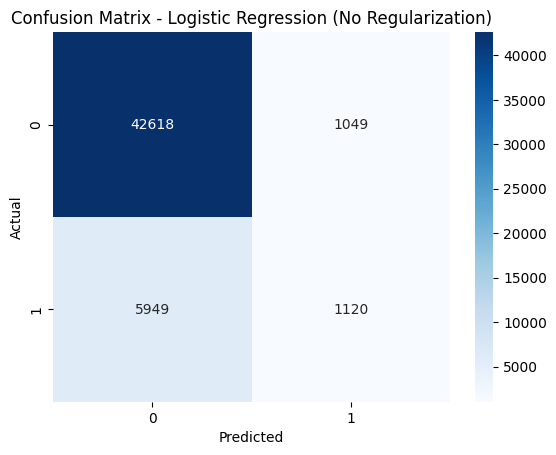

In [10]:
# 2a. Logistic Regression without regularization (use None, not 'none')
logreg = LogisticRegression(penalty=None, max_iter=1000, solver='saga')

# Train the model
logreg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (No Regularization)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2b: Logistic Regression with L1 (Lasso)

Classification Report (L1):
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     43667
         1.0       0.52      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736

Accuracy: 0.8620703248186692
Precision: 0.5163669893960351
Recall: 0.1584382515207243
F1 Score: 0.2424767265641914


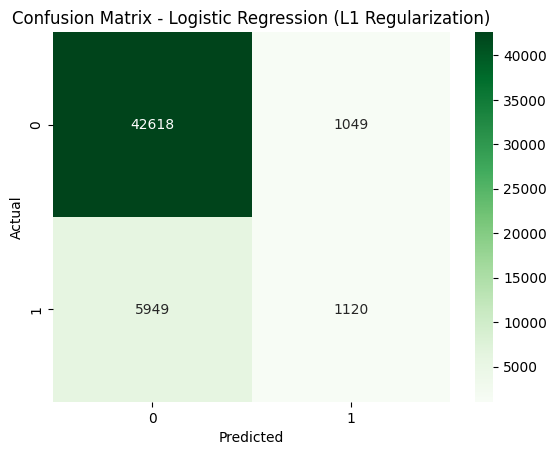

In [11]:
# 2b. Logistic Regression with L1 regularization (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='saga', C=1.0, max_iter=1000)

# Train the model
logreg_l1.fit(X_train_scaled, y_train)

# Predict
y_pred_l1 = logreg_l1.predict(X_test_scaled)

# Evaluate
print("Classification Report (L1):\n", classification_report(y_test, y_pred_l1))
print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print("Precision:", precision_score(y_test, y_pred_l1))
print("Recall:", recall_score(y_test, y_pred_l1))
print("F1 Score:", f1_score(y_test, y_pred_l1))

# Confusion Matrix
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
sns.heatmap(conf_matrix_l1, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression (L1 Regularization)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2c: Logistic Regression with L2 (Ridge)

## Logistic Regression with L2 Regularization

Classification Report (L2):
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     43667
         1.0       0.52      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736

Accuracy: 0.8621294544307789
Precision: 0.517097966728281
Recall: 0.15829678879615222
F1 Score: 0.24239142207299902


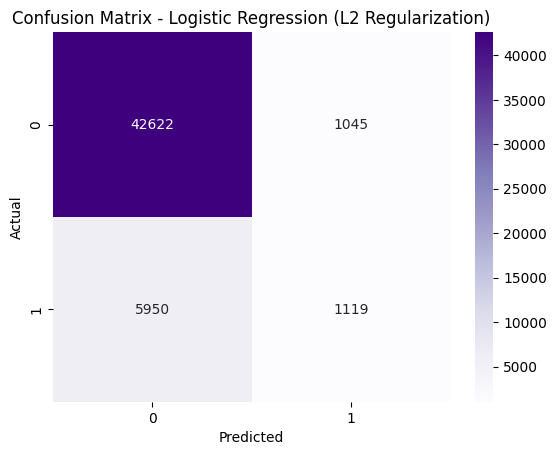

In [12]:
# 2c. Logistic Regression with L2 regularization (Ridge)
logreg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, max_iter=1000)

# Train the model
logreg_l2.fit(X_train_scaled, y_train)

# Predict
y_pred_l2 = logreg_l2.predict(X_test_scaled)

# Evaluate
print("Classification Report (L2):\n", classification_report(y_test, y_pred_l2))
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Precision:", precision_score(y_test, y_pred_l2))
print("Recall:", recall_score(y_test, y_pred_l2))
print("F1 Score:", f1_score(y_test, y_pred_l2))

# Confusion matrix
conf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)
sns.heatmap(conf_matrix_l2, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression (L2 Regularization)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 2d: Comparison & discussion(we discussed it in report)

# 3. SVM (linear, poly, RBF)

## 3a: SVM with linear kernel

Classification Report (Linear SVM):
               precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43667
         1.0       0.56      0.07      0.12      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.53      0.52     50736
weighted avg       0.82      0.86      0.81     50736

Accuracy: 0.8626616209397666
Precision: 0.5573212258796821
Recall: 0.06945819776488896
F1 Score: 0.12352201257861635


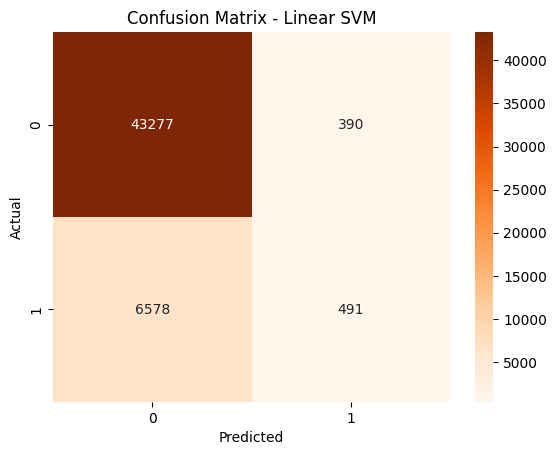

In [13]:
from sklearn.svm import LinearSVC

# 3a. Linear SVM
linear_svm = LinearSVC(max_iter=10000)  # Increase max_iter to avoid convergence warnings

# Train the model
linear_svm.fit(X_train_scaled, y_train)

# Predict
y_pred_linear = linear_svm.predict(X_test_scaled)

# Evaluate
print("Classification Report (Linear SVM):\n", classification_report(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Precision:", precision_score(y_test, y_pred_linear))
print("Recall:", recall_score(y_test, y_pred_linear))
print("F1 Score:", f1_score(y_test, y_pred_linear))

# Confusion matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3b: SVM with Polynomial Kernel

## polynomial kernel can be slow on large datasets

## Sample 10,000 training examples

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into X and y
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Sample 10,000 rows from the training set
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_scaled, y_train, train_size=10000, stratify=y_train, random_state=42
)

## 3b: Polynomial Kernel SVM (with 10K sampled data)

Classification Report (Polynomial SVM):
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43667
         1.0       0.46      0.12      0.19      7069

    accuracy                           0.86     50736
   macro avg       0.67      0.55      0.56     50736
weighted avg       0.82      0.86      0.82     50736

Accuracy: 0.8580692210659098
Precision: 0.46397379912663755
Recall: 0.12024331588626397
F1 Score: 0.19098977642961465


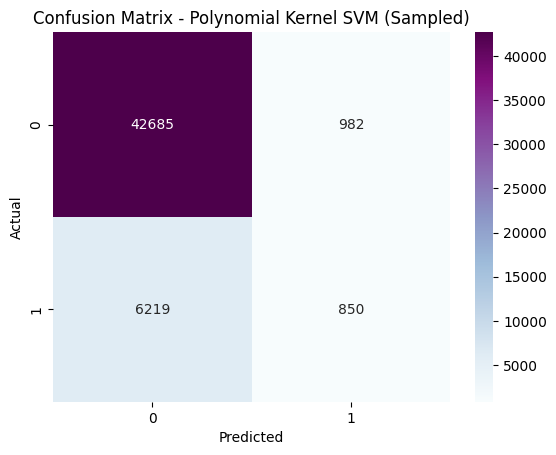

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train_sampled, y_train_sampled)

# Predict on full test set
y_pred_poly = svm_poly.predict(X_test_scaled)

# Evaluate
print("Classification Report (Polynomial SVM):\n", classification_report(y_test, y_pred_poly))
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Precision:", precision_score(y_test, y_pred_poly))
print("Recall:", recall_score(y_test, y_pred_poly))
print("F1 Score:", f1_score(y_test, y_pred_poly))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_poly), annot=True, fmt='d', cmap='BuPu')
plt.title("Confusion Matrix - Polynomial Kernel SVM (Sampled)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3c: SVM with RBF kernel

## RBF Kernel SVM (Sampled Data)

Classification Report (RBF SVM):
               precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43667
         1.0       0.56      0.07      0.12      7069

    accuracy                           0.86     50736
   macro avg       0.72      0.53      0.53     50736
weighted avg       0.83      0.86      0.81     50736

Accuracy: 0.8628981393882056
Precision: 0.56442417331813
Recall: 0.07002404866317725
F1 Score: 0.12459098917694438


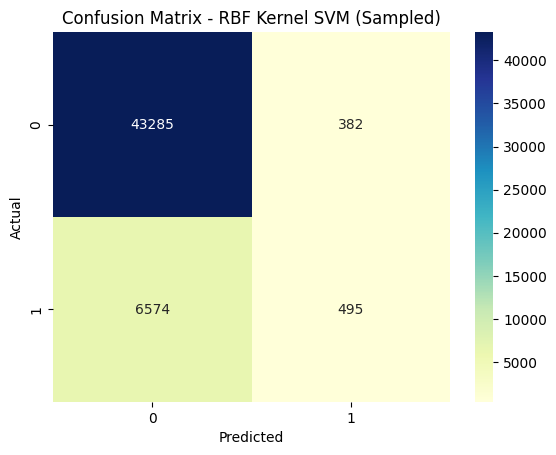

In [17]:
# 3c. SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0)
svm_rbf.fit(X_train_sampled, y_train_sampled)

# Predict on full test set
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluate
print("Classification Report (RBF SVM):\n", classification_report(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Precision:", precision_score(y_test, y_pred_rbf))
print("Recall:", recall_score(y_test, y_pred_rbf))
print("F1 Score:", f1_score(y_test, y_pred_rbf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - RBF Kernel SVM (Sampled)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 3d: Comparison is provided in the report.

# 4a: Build and test two different neural network

One simple feedforward (1–2 hidden layers)

One deeper model (3+ hidden layers, dropout)

## 4b: Compare performance (accuracy, precision, recall, F1, confusion matrix, training loss)

 # Define the Simple NN (Model A)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4a. Simple NN - 1 hidden layer
model_a = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(1, activation='sigmoid')
])

model_a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_a = model_a.fit(X_train_scaled, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8232 - loss: 0.3943 - val_accuracy: 0.8687 - val_loss: 0.3105
Epoch 2/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8658 - loss: 0.3160 - val_accuracy: 0.8696 - val_loss: 0.3081
Epoch 3/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8669 - loss: 0.3126 - val_accuracy: 0.8690 - val_loss: 0.3078
Epoch 4/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8657 - loss: 0.3152 - val_accuracy: 0.8695 - val_loss: 0.3077
Epoch 5/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8658 - loss: 0.3134 - val_accuracy: 0.8697 - val_loss: 0.3073
Epoch 6/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8673 - loss: 0.3109 - val_accuracy: 0.8701 - val_loss: 0.3073
Epoch 7/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8674 - loss: 0.3107 - val_accuracy: 0.8688 - val_loss: 0.3079
Epoch 8/10
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8674 - loss: 0.3088 - 

## Evaluate Model A on Test Set

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Classification Report - Simple NN:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.56      0.15      0.24      7069

    accuracy                           0.87     50736
   macro avg       0.72      0.57      0.58     50736
weighted avg       0.83      0.87      0.83     50736

Accuracy: 0.8650070955534531
Precision: 0.5568181818181818
Recall: 0.15249681708869714
F1 Score: 0.2394225430316491


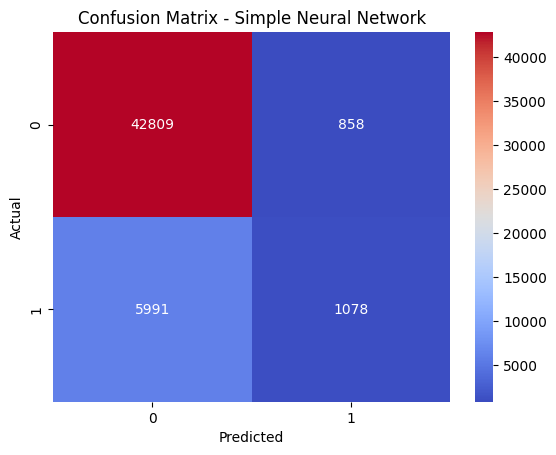

In [19]:
# Predict probabilities
y_pred_a_prob = model_a.predict(X_test_scaled)

# Convert to class labels (threshold = 0.5)
y_pred_a = (y_pred_a_prob > 0.5).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Classification Report - Simple NN:")
print(classification_report(y_test, y_pred_a))

print("Accuracy:", accuracy_score(y_test, y_pred_a))
print("Precision:", precision_score(y_test, y_pred_a))
print("Recall:", recall_score(y_test, y_pred_a))
print("F1 Score:", f1_score(y_test, y_pred_a))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_a), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - Simple Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Build Model B (Deeper NN + Dropout)

In [20]:
from tensorflow.keras.layers import Dropout

# 4a. Deep NN with 3 hidden layers and dropout
model_b = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_b = model_b.fit(X_train_scaled, y_train, epochs=15, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8571 - loss: 0.3500 - val_accuracy: 0.8687 - val_loss: 0.3109
Epoch 2/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8638 - loss: 0.3188 - val_accuracy: 0.8695 - val_loss: 0.3111
Epoch 3/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8663 - loss: 0.3136 - val_accuracy: 0.8689 - val_loss: 0.3175
Epoch 4/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8633 - loss: 0.3180 - val_accuracy: 0.8696 - val_loss: 0.3087
Epoch 5/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8650 - loss: 0.3140 - val_accuracy: 0.8692 - val_loss: 0.3150
Epoch 6/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8647 - loss: 0.3159 - val_accuracy: 0.8691 - val_loss: 0.3099
Epoch 7/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8649 - loss: 0.3163 - val_accuracy: 0.8693 - val_loss: 0.3093
Epoch 8/15
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8636 - loss: 0.3170 - 

## Evaluate Model B on Test Set

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
Classification Report - Deep NN:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.55      0.16      0.25      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.86      0.83     50736

Accuracy: 0.8645931882686849
Precision: 0.5477218225419664
Recall: 0.16155043146130996
F1 Score: 0.24950841162333406


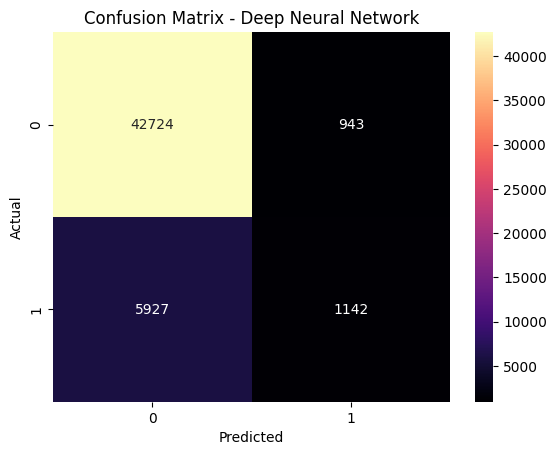

In [21]:
# Predict probabilities
y_pred_b_prob = model_b.predict(X_test_scaled)

# Convert to class labels
y_pred_b = (y_pred_b_prob > 0.5).astype(int)

# Evaluation
print("Classification Report - Deep NN:")
print(classification_report(y_test, y_pred_b))

print("Accuracy:", accuracy_score(y_test, y_pred_b))
print("Precision:", precision_score(y_test, y_pred_b))
print("Recall:", recall_score(y_test, y_pred_b))
print("F1 Score:", f1_score(y_test, y_pred_b))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_b), annot=True, fmt='d', cmap='magma')
plt.title("Confusion Matrix - Deep Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5a. Run logistic regression and SVM with k-fold cross-validation

# 5b. Compare results with and without stratification

## Step 1: Logistic Regression with Cross-Validation

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

# Regular logistic regression
logreg_cv = LogisticRegression(max_iter=1000)

# Stratified K-Fold
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Non-stratified K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate with and without stratification
scores_strat = cross_val_score(logreg_cv, X, y, cv=strat_kf, scoring='f1')
scores_non_strat = cross_val_score(logreg_cv, X, y, cv=kf, scoring='f1')

print("Logistic Regression - Stratified 5-Fold F1 Scores:", scores_strat)
print("Mean F1 (Stratified):", scores_strat.mean())

print("\nLogistic Regression - Non-Stratified 5-Fold F1 Scores:", scores_non_strat)
print("Mean F1 (Non-Stratified):", scores_non_strat.mean())

Logistic Regression - Stratified 5-Fold F1 Scores: [0.24637053 0.23535887 0.24409449 0.23860885 0.24282415]
Mean F1 (Stratified): 0.24145137820671447

Logistic Regression - Non-Stratified 5-Fold F1 Scores: [0.25337282 0.23204787 0.2386376  0.2459695  0.23429579]
Mean F1 (Non-Stratified): 0.24086471553919467


## SVM Cross-Validation with and without Stratification

In [23]:
from sklearn.svm import LinearSVC

# Use same folds as before
svm_cv = LinearSVC(max_iter=10000)

# With stratification
svm_scores_strat = cross_val_score(svm_cv, X, y, cv=strat_kf, scoring='f1')

# Without stratification
svm_scores_non_strat = cross_val_score(svm_cv, X, y, cv=kf, scoring='f1')

# Output
print("Linear SVM - Stratified 5-Fold F1 Scores:", svm_scores_strat)
print("Mean F1 (Stratified):", svm_scores_strat.mean())

print("\nLinear SVM - Non-Stratified 5-Fold F1 Scores:", svm_scores_non_strat)
print("Mean F1 (Non-Stratified):", svm_scores_non_strat.mean())

Linear SVM - Stratified 5-Fold F1 Scores: [0.12416404 0.11766198 0.12526834 0.12044213 0.12612613]
Mean F1 (Stratified): 0.12273252213629629

Linear SVM - Non-Stratified 5-Fold F1 Scores: [0.12461696 0.11969504 0.119      0.12427086 0.12474645]
Mean F1 (Non-Stratified): 0.12246586212120585
